<a href="https://colab.research.google.com/github/Rohithtechis/Unsupervised_Learning/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [7]:
# checking for Null values
df.isna().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
# Dropping the null values
df1=df.dropna()

In [9]:
# Verifing if there is any null values left.
df1.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [10]:
df1.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [11]:
#df1[['Total Benefits','Other Benefits']]
df1.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [12]:
df1.drop({'Total Benefits','Other Benefits','Total Salary','Other Salaries'},axis =1, inplace= True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Retirement,Health and Dental,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,11253.16,11961.34,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,10284.88,7176.80,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,12495.83,12918.24,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,19644.45,12918.24,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,1083.90,956.91,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43836214,98444.94,0.0,20540.24,15275.18,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43966403,9416.71,0.0,1904.43,1468.77,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",44016180,96475.00,0.0,20241.56,14100.16,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Pr Investigator, Tax Collector",42423439,115943.00,0.0,24188.37,15275.18,164424.89


In [13]:
df1.drop('Salaries',axis=1,inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Retirement,Health and Dental,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,11253.16,11961.34,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,10284.88,7176.80,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,12495.83,12918.24,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,19644.45,12918.24,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,1083.90,956.91,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43836214,0.0,20540.24,15275.18,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43966403,0.0,1904.43,1468.77,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",44016180,0.0,20241.56,14100.16,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Pr Investigator, Tax Collector",42423439,0.0,24188.37,15275.18,164424.89


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  682919 non-null  int64  
 1   Job Family Code          682919 non-null  object 
 2   Job Code                 682919 non-null  object 
 3   Year Type                682919 non-null  object 
 4   Year                     682919 non-null  int64  
 5   Organization Group       682919 non-null  object 
 6   Department Code          682919 non-null  object 
 7   Department               682919 non-null  object 
 8   Union Code               682919 non-null  float64
 9   Union                    682919 non-null  object 
 10  Job Family               682919 non-null  object 
 11  Job                      682919 non-null  object 
 12  Employee Identifier      682919 non-null  int64  
 13  Overtime                 682919 non-null  float64
 14  Reti

In [15]:
df1.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Retirement,Health and Dental,Total Compensation
count,682919.000000,682919.000000,682919.000000,6.829190e+05,682919.000000,682919.000000,682919.000000,682919.000000
mean,2.977261,2016.364560,492.531570,1.709568e+07,5476.651604,13664.568361,9950.032677,107257.159388
std,1.579440,2.092694,330.911745,1.926007e+07,13112.641274,10109.190457,5732.227856,72282.967638
min,1.000000,2013.000000,1.000000,0.000000e+00,-12308.660000,-30621.430000,-3831.090000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.546200e+04,0.000000,4679.095000,4784.540000,44540.265000
50%,2.000000,2017.000000,535.000000,5.099500e+04,0.000000,13862.820000,12501.250000,107563.090000
75%,4.000000,2018.000000,790.000000,3.737713e+07,4226.340000,20155.985000,14037.160000,154201.665000
max,7.000000,2020.000000,990.000000,4.434643e+07,321523.310000,121952.520000,59405.230000,807625.250000


In [16]:
# Checking the types of data present in the data set.
df1.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Overtime                   float64
Retirement                 float64
Health and Dental          float64
Total Compensation         float64
dtype: object

In [17]:
# Printing the total number of unique vlaues present in each column.
cols=df1.columns
for i in cols:
  print(i, 'Has :',df1[i].nunique(),"Unique Values")

Organization Group Code Has : 7 Unique Values
Job Family Code Has : 59 Unique Values
Job Code Has : 1210 Unique Values
Year Type Has : 2 Unique Values
Year Has : 8 Unique Values
Organization Group Has : 7 Unique Values
Department Code Has : 60 Unique Values
Department Has : 109 Unique Values
Union Code Has : 70 Unique Values
Union Has : 129 Unique Values
Job Family Has : 59 Unique Values
Job Has : 1348 Unique Values
Employee Identifier Has : 309658 Unique Values
Overtime Has : 261976 Unique Values
Retirement Has : 451568 Unique Values
Health and Dental Has : 209844 Unique Values
Total Compensation Has : 658354 Unique Values


In [18]:
df1.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Retirement,Health and Dental,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,11253.16,11961.34,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,10284.88,7176.80,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,12495.83,12918.24,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,19644.45,12918.24,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,1083.90,956.91,7512.31


In [19]:
df1.drop({'Organization Group Code','Year Type','Year','Organization Group'},axis=1,inplace=True)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Job Family Code,Job Code,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Retirement,Health and Dental,Total Compensation
0,1000,1021,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,11253.16,11961.34,85281.78
1,1000,1023,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,10284.88,7176.80,79895.32
2,1000,1031,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,12495.83,12918.24,93649.71
3,1000,1054,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,19644.45,12918.24,134237.37
4,1000,1062,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,1083.90,956.91,7512.31


In [20]:
df1.shape

(682919, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


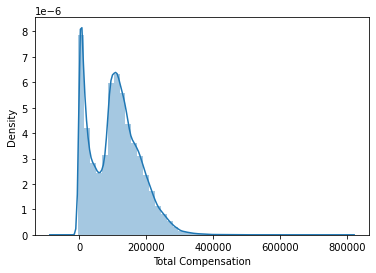

In [21]:
sns.distplot(df1['Total Compensation'])
plt.show()

In [22]:
df1.dtypes

Job Family Code         object
Job Code                object
Department Code         object
Department              object
Union Code             float64
Union                   object
Job Family              object
Job                     object
Employee Identifier      int64
Overtime               float64
Retirement             float64
Health and Dental      float64
Total Compensation     float64
dtype: object

In [23]:
# Concidering only the numerical values.
df2=df1.select_dtypes(include=('int64','float64'))
df2.head()

,Union Code,Employee Identifier,Overtime,Retirement,Health and Dental,Total Compensation
0,21.0,37730,0.0,11253.16,11961.34,85281.78
1,21.0,26574,0.0,10284.88,7176.80,79895.32
2,21.0,8148,0.0,12495.83,12918.24,93649.71
3,21.0,27436,0.0,19644.45,12918.24,134237.37
4,21.0,37730,0.0,1083.90,956.91,7512.31


In [24]:
df2.dtypes

Union Code             float64
Employee Identifier      int64
Overtime               float64
Retirement             float64
Health and Dental      float64
Total Compensation     float64
dtype: object

In [25]:
df2.drop({'Union Code','Employee Identifier','Overtime'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df2['Total Compensation'].skew()

0.409119326382282

In [27]:
df2['Total Compensation'].kurt()

0.020115932230928113

In [28]:
df2.head()

,Retirement,Health and Dental,Total Compensation
0,11253.16,11961.34,85281.78
1,10284.88,7176.80,79895.32
2,12495.83,12918.24,93649.71
3,19644.45,12918.24,134237.37
4,1083.90,956.91,7512.31


In [29]:
df2['Health_and_Retirement']=df2['Retirement']+df2['Health and Dental']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df2.drop({'Health and Dental','Retirement'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df2.head()

,Total Compensation,Health_and_Retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [53]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df2)
print(scaled)

[[0.18074512 0.32026192]
 [0.174636   0.28603925]
 [0.19023571 0.33334684]
 ...
 [0.2419989  0.3864561 ]
 [0.27050626 0.4169251 ]
 [0.27164402 0.4169251 ]]


In [54]:
# Importing K-Means cluster algorithm 
from sklearn.cluster import KMeans

In [55]:
# Assuming the K as 3
kmeans=KMeans(n_clusters=3)

In [56]:
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
print(kmeans.cluster_centers_)

[[ 23376.41060425   4964.7611569 ]
 [115353.78677772  27577.47451046]
 [207340.60980895  41374.01183902]]


In [61]:
y=kmeans.predict(df2)

In [59]:
y=kmeans.labels_
y

array([1, 1, 1, ..., 1, 2, 2], dtype=int32)

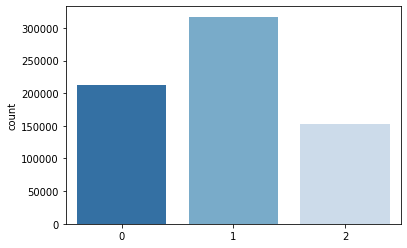

In [62]:
sns.countplot(x=kmeans.labels_, palette='Blues_r')
plt.show()

In [40]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [44]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df2
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [45]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 59852.102391580454
2 : 36725.61902221224
3 : 22468.810482920577
4 : 17836.57145030054
5 : 14858.040291317348
6 : 12667.508689782437
7 : 11122.126986020392
8 : 10231.462389106022
9 : 9275.825438337817


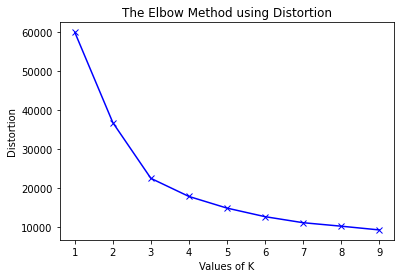

In [46]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

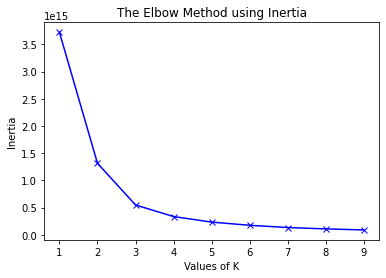

In [47]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [63]:
# Confirming the K value as 3 from elbow method.
kmeans=KMeans(n_clusters=3)

In [64]:
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
print(kmeans.cluster_centers_)

[[ 23555.66329817   5009.85948008]
 [207762.54983196  41434.84712937]
 [115677.10544453  27637.96754169]]


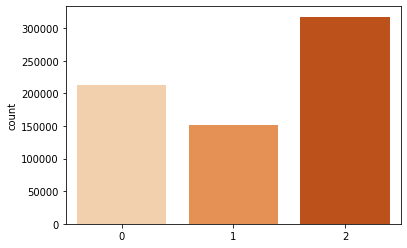

In [66]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [68]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(X,y)

0.6038708751017272